# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
pip install beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import os

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | LHR T5 BA Gold Wing worked wel...
1,Not Verified | Very good service on this rout...
2,✅ Trip Verified | Flight mainly let down by ...
3,✅ Trip Verified | Another awful experience b...
4,"✅ Trip Verified | The service was rude, full..."


In [ ]:
df.to_csv("BA_reviews.csv")

In [ ]:
data = pd.read_csv("BA_reviews.csv")
data.head()

,Unnamed: 0,reviews
0,0,Not Verified | LHR T5 BA Gold Wing worked wel...
1,1,Not Verified | Very good service on this rout...
2,2,✅ Trip Verified | Flight mainly let down by ...
3,3,✅ Trip Verified | Another awful experience b...
4,4,"✅ Trip Verified | The service was rude, full..."


In [ ]:
data.drop('Unnamed: 0',axis = 1 , inplace= True)
data.head()

,reviews
0,Not Verified | LHR T5 BA Gold Wing worked wel...
1,Not Verified | Very good service on this rout...
2,✅ Trip Verified | Flight mainly let down by ...
3,✅ Trip Verified | Another awful experience b...
4,"✅ Trip Verified | The service was rude, full..."


In [ ]:
data.iloc[0]

,0
reviews,Not Verified | LHR T5 BA Gold Wing worked wel...


## Normalize Casing
- convert all text to lower cas so it is all treated the same
- turn the column into a python list so it is easy to loop through

In [ ]:
review = data['reviews'].str.lower().to_list()

In [ ]:
review[:5]

['not verified |  lhr t5 ba gold wing worked well. pleasant check in and very fast security screening. concorde room service attentive. c gate boarding ok but nothing special for first passengers. latest ba version of first with only 8 suites with privacy doors. comfortable seat with plenty of stowage. good screen and good choice of ife. amenity kit good quality and bedding, pillows cushions and blankets all good. excellent menu and food very well presented. cabin crew could not have been more attentive and helpful without being obtrusive. on time departure and early arrival. bags delivered relatively swiftly and priority tagged bags were first off. all in all one of the best ba first flights i’ve had in many years. whilst not touching the middle eastern carriers ba first on this showing is easily the best way to cross the atlantic.',
 'not verified |  very good service on this route ba2710 30th march. cabin crew worked hard, particularly ivka (?) who was on the go throughout the fligh

Remove the unkown characters and numbers in order not to spoile the text preprocessing

In [ ]:
review = [r.replace('✅', '').strip() for r in review]

In [ ]:
review[:5]

['not verified |  lhr t5 ba gold wing worked well. pleasant check in and very fast security screening. concorde room service attentive. c gate boarding ok but nothing special for first passengers. latest ba version of first with only 8 suites with privacy doors. comfortable seat with plenty of stowage. good screen and good choice of ife. amenity kit good quality and bedding, pillows cushions and blankets all good. excellent menu and food very well presented. cabin crew could not have been more attentive and helpful without being obtrusive. on time departure and early arrival. bags delivered relatively swiftly and priority tagged bags were first off. all in all one of the best ba first flights i’ve had in many years. whilst not touching the middle eastern carriers ba first on this showing is easily the best way to cross the atlantic.',
 'not verified |  very good service on this route ba2710 30th march. cabin crew worked hard, particularly ivka (?) who was on the go throughout the fligh

In [ ]:
review = [re.sub("[.,|?()-:='~^0-9\\\]"," ", item) for item in review]

In [ ]:
review[:5]

['not verified    lhr t  ba gold wing worked well  pleasant check in and very fast security screening  concorde room service attentive  c gate boarding ok but nothing special for first passengers  latest ba version of first with only   suites with privacy doors  comfortable seat with plenty of stowage  good screen and good choice of ife  amenity kit good quality and bedding  pillows cushions and blankets all good  excellent menu and food very well presented  cabin crew could not have been more attentive and helpful without being obtrusive  on time departure and early arrival  bags delivered relatively swiftly and priority tagged bags were first off  all in all one of the best ba first flights i’ve had in many years  whilst not touching the middle eastern carriers ba first on this showing is easily the best way to cross the atlantic ',
 'not verified    very good service on this route ba       th march  cabin crew worked hard  particularly ivka     who was on the go throughout the fligh

# Tokenize the reviews

In [ ]:
pip install nltk


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
review_tokens = [tokenizer.tokenize(item) for item in review]
print(review_tokens[:5])


[['not', 'verified', 'lhr', 't', 'ba', 'gold', 'wing', 'worked', 'well', 'pleasant', 'check', 'in', 'and', 'very', 'fast', 'security', 'screening', 'concorde', 'room', 'service', 'attentive', 'c', 'gate', 'boarding', 'ok', 'but', 'nothing', 'special', 'for', 'first', 'passengers', 'latest', 'ba', 'version', 'of', 'first', 'with', 'only', 'suites', 'with', 'privacy', 'doors', 'comfortable', 'seat', 'with', 'plenty', 'of', 'stowage', 'good', 'screen', 'and', 'good', 'choice', 'of', 'ife', 'amenity', 'kit', 'good', 'quality', 'and', 'bedding', 'pillows', 'cushions', 'and', 'blankets', 'all', 'good', 'excellent', 'menu', 'and', 'food', 'very', 'well', 'presented', 'cabin', 'crew', 'could', 'not', 'have', 'been', 'more', 'attentive', 'and', 'helpful', 'without', 'being', 'obtrusive', 'on', 'time', 'departure', 'and', 'early', 'arrival', 'bags', 'delivered', 'relatively', 'swiftly', 'and', 'priority', 'tagged', 'bags', 'were', 'first', 'off', 'all', 'in', 'all', 'one', 'of', 'the', 'best', '

# NLTK POS tagger
Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.

In [ ]:
# Check if the resource is already downloaded
if nltk.data.find('taggers/averaged_perceptron_tagger') is not None:
    print("Resource 'averaged_perceptron_tagger' is already downloaded.")
else:
    print("Resource 'averaged_perceptron_tagger' is not downloaded.")

Resource 'averaged_perceptron_tagger' is already downloaded.


In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
from nltk import pos_tag

# Assuming review_tokens is already defined
review_postage = [pos_tag(item) for item in review_tokens]

# Print the first 5 POS-tagged reviews
print(review_postage[:5])

[[('not', 'RB'), ('verified', 'VBN'), ('lhr', 'JJ'), ('t', 'NN'), ('ba', 'NN'), ('gold', 'NN'), ('wing', 'NN'), ('worked', 'VBN'), ('well', 'RB'), ('pleasant', 'JJ'), ('check', 'NN'), ('in', 'IN'), ('and', 'CC'), ('very', 'RB'), ('fast', 'JJ'), ('security', 'NN'), ('screening', 'VBG'), ('concorde', 'NN'), ('room', 'NN'), ('service', 'NN'), ('attentive', 'JJ'), ('c', 'NN'), ('gate', 'NN'), ('boarding', 'VBG'), ('ok', 'JJ'), ('but', 'CC'), ('nothing', 'NN'), ('special', 'JJ'), ('for', 'IN'), ('first', 'JJ'), ('passengers', 'NNS'), ('latest', 'JJS'), ('ba', 'JJ'), ('version', 'NN'), ('of', 'IN'), ('first', 'JJ'), ('with', 'IN'), ('only', 'JJ'), ('suites', 'NNS'), ('with', 'IN'), ('privacy', 'NN'), ('doors', 'NNS'), ('comfortable', 'JJ'), ('seat', 'NN'), ('with', 'IN'), ('plenty', 'NN'), ('of', 'IN'), ('stowage', 'NN'), ('good', 'JJ'), ('screen', 'NN'), ('and', 'CC'), ('good', 'JJ'), ('choice', 'NN'), ('of', 'IN'), ('ife', 'JJ'), ('amenity', 'NN'), ('kit', 'NN'), ('good', 'JJ'), ('quality'

## Include Nouns
For the topic model, we should want to include only nouns.

1.Find out all the POS tags that correspond to nouns.

2.Limit the data to only terms with these tags

In [ ]:
 nltk.download('tagsets_json')

[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.


True

In [ ]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [ ]:
noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']

review_postags_nouns = []

for item in review_postage:
    noun_tokens = [token_tag[0] for token_tag in item if token_tag[1] in noun_tags]
    review_postags_nouns.append(noun_tokens)

print(review_postags_nouns[:5])

[['t', 'ba', 'gold', 'wing', 'check', 'security', 'concorde', 'room', 'service', 'c', 'gate', 'nothing', 'passengers', 'version', 'suites', 'privacy', 'doors', 'seat', 'plenty', 'stowage', 'screen', 'choice', 'amenity', 'kit', 'quality', 'bedding', 'pillows', 'cushions', 'blankets', 'excellent', 'menu', 'food', 'cabin', 'crew', 'time', 'departure', 'arrival', 'bags', 'priority', 'bags', 'ba', 'flights', 'i’ve', 'years', 'carriers', 'showing', 'way', 'atlantic'], ['service', 'route', 'ba', 'march', 'cabin', 'crew', 'ivka', 'go', 'flight', 'everything', 'ba', 'flight', 'singapore', 'business', 'class', 'th', 'feb', 'ba', 'crew', 'anything', 'sleep', 'haul', 'performers', 'others'], ['trip', 'flight', 'flight', 'attendant', 'queue', 'cape', 'town', 'agent', 'size', 'weight', 'rules', 'sports', 'bags', 'minutes', 'phone', 'calls', 'lounge', 'gate', 'service', 'queues', 'seat', 'club', 'zip', 'amenity', 'kit', 'ba', 'corners', 'cocktail', 'service', 'drink', 'galley', 'nuts', 'snack', 'flig

## lemmatize
1.Different forms of the terms need to be treated as one.

2.No need to provide POS tag to lemmatizer for now.

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk import WordNetLemmatizer
wnl= WordNetLemmatizer()
review_postags_nouns_lemmed=[]
for item in review_postags_nouns:
  lemmed_tokens = [wnl.lemmatize(token, 'n') for token in item]
  review_postags_nouns_lemmed.append(lemmed_tokens)
  print(review_postags_nouns_lemmed[:5])

[['t', 'ba', 'gold', 'wing', 'check', 'security', 'concorde', 'room', 'service', 'c', 'gate', 'nothing', 'passenger', 'version', 'suite', 'privacy', 'door', 'seat', 'plenty', 'stowage', 'screen', 'choice', 'amenity', 'kit', 'quality', 'bedding', 'pillow', 'cushion', 'blanket', 'excellent', 'menu', 'food', 'cabin', 'crew', 'time', 'departure', 'arrival', 'bag', 'priority', 'bag', 'ba', 'flight', 'i’ve', 'year', 'carrier', 'showing', 'way', 'atlantic']]
[['t', 'ba', 'gold', 'wing', 'check', 'security', 'concorde', 'room', 'service', 'c', 'gate', 'nothing', 'passenger', 'version', 'suite', 'privacy', 'door', 'seat', 'plenty', 'stowage', 'screen', 'choice', 'amenity', 'kit', 'quality', 'bedding', 'pillow', 'cushion', 'blanket', 'excellent', 'menu', 'food', 'cabin', 'crew', 'time', 'departure', 'arrival', 'bag', 'priority', 'bag', 'ba', 'flight', 'i’ve', 'year', 'carrier', 'showing', 'way', 'atlantic'], ['service', 'route', 'ba', 'march', 'cabin', 'crew', 'ivka', 'go', 'flight', 'everything

## Remove stopwords and puncutuation

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import string
sw = stopwords.words('english')
punc= list(string.punctuation)

custom_sw = sw + punc
review_preprocessed = []
for item in review_postags_nouns_lemmed:
  if len(item)>0:
    preprocessed_token = [token for token in item if token not in custom_sw and len(token)>1]
    review_preprocessed.append(preprocessed_token)
  else :
    review_preprocessed.append(item)
print(review_preprocessed[:5])

[['ba', 'gold', 'wing', 'check', 'security', 'concorde', 'room', 'service', 'gate', 'nothing', 'passenger', 'version', 'suite', 'privacy', 'door', 'seat', 'plenty', 'stowage', 'screen', 'choice', 'amenity', 'kit', 'quality', 'bedding', 'pillow', 'cushion', 'blanket', 'excellent', 'menu', 'food', 'cabin', 'crew', 'time', 'departure', 'arrival', 'bag', 'priority', 'bag', 'ba', 'flight', 'i’ve', 'year', 'carrier', 'showing', 'way', 'atlantic'], ['service', 'route', 'ba', 'march', 'cabin', 'crew', 'ivka', 'go', 'flight', 'everything', 'ba', 'flight', 'singapore', 'business', 'class', 'th', 'feb', 'ba', 'crew', 'anything', 'sleep', 'haul', 'performer', 'others'], ['trip', 'flight', 'flight', 'attendant', 'queue', 'cape', 'town', 'agent', 'size', 'weight', 'rule', 'sport', 'bag', 'minute', 'phone', 'call', 'lounge', 'gate', 'service', 'queue', 'seat', 'club', 'zip', 'amenity', 'kit', 'ba', 'corner', 'cocktail', 'service', 'drink', 'galley', 'nut', 'snack', 'flight', 'attendant', 'distaste', 

In [ ]:
from collections import Counter

# Flattening the list of tokenized words
all_tokens = [token for review in review_preprocessed for token in review]
word_freq = Counter(all_tokens)

# Display the top 10 most common words
print(word_freq.most_common(10))


[('flight', 4529), ('ba', 2030), ('seat', 1945), ('service', 1675), ('trip', 1595), ('time', 1289), ('food', 1128), ('hour', 1123), ('airline', 1051), ('class', 1000)]


In [ ]:
from nltk import ngrams

bigrams = list(ngrams(all_tokens, 2))
bigram_freq = Counter(bigrams)
print(bigram_freq.most_common(10))


[(('business', 'class'), 630), (('customer', 'service'), 369), (('cabin', 'crew'), 327), (('hour', 'flight'), 214), (('flight', 'time'), 205), (('flight', 'hour'), 191), (('flight', 'flight'), 182), (('return', 'flight'), 169), (('trip', 'london'), 153), (('flight', 'ba'), 151)]


In [ ]:
from textblob import TextBlob

sentiments = []
for review in review_preprocessed:
    text = ' '.join(review)
    sentiment = TextBlob(text).sentiment.polarity  # -1 (negative) to 1 (positive)
    sentiments.append(sentiment)

# Average sentiment
avg_sentiment = sum(sentiments) / len(sentiments)
print(f"Average sentiment: {avg_sentiment}")


Average sentiment: -0.0007790122473425963


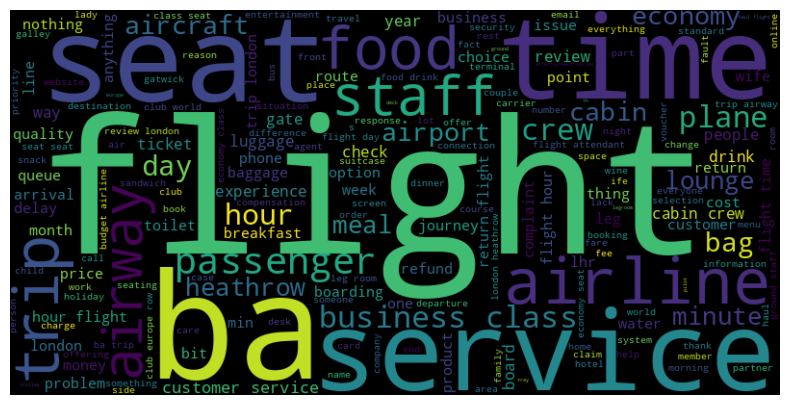

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a string of all tokens
text = ' '.join(all_tokens)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from textblob import TextBlob

sentiments = []
for review in review_preprocessed:
    text = ' '.join(review)  # Convert list of tokens back to a string
    sentiment = TextBlob(text).sentiment.polarity  # -1 (negative) to 1 (positive)
    sentiments.append(sentiment)

# Classify the sentiment
sentiment_labels = ['positive' if s > 0 else 'negative' if s < 0 else 'neutral' for s in sentiments]
print(sentiment_labels[:5])  # Preview the sentiment labels


['positive', 'neutral', 'positive', 'neutral', 'negative']


In [ ]:
from textblob import TextBlob

ratings = []
for review in review_preprocessed:
    text = ' '.join(review)  # Convert the list of tokens back to a string
    sentiment = TextBlob(text).sentiment.polarity  # -1 (negative) to 1 (positive)

    # Assign rating based on polarity
    if sentiment > 0.1:
        # Positive review (rating 4 or 5)
        rating = 5 if sentiment > 0.5 else 4
    elif sentiment < -0.1:
        # Negative review (rating 1 or 2)
        rating = 2 if sentiment < -0.5 else 1
    else:
        # Neutral review (rating 3)
        rating = 3
    ratings.append(rating)

# Display the first 5 ratings
print(ratings[:5])


[5, 3, 4, 3, 3]


In [ ]:
average_rating = sum(ratings) / len(ratings)
print(f"Overall customer satisfaction score: {average_rating:.2f}")


Overall customer satisfaction score: 2.85


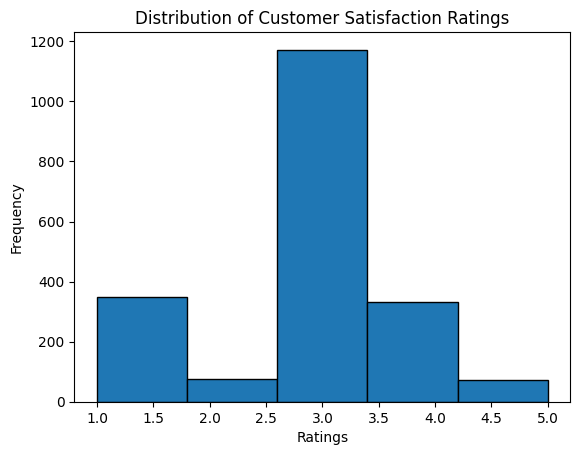

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of ratings
plt.hist(ratings, bins=5, edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Satisfaction Ratings')
plt.show()


Summary:
Positive reviews will have higher ratings (4 or 5).

Negative reviews will have lower ratings (1 or 2).

Neutral reviews will get a rating of 3.

The average rating gives you the overall customer satisfaction score.



In [ ]:
from collections import Counter
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Separate positive and negative reviews
positive_reviews = [review for review, sentiment in zip(review_preprocessed, sentiment_labels) if sentiment == 'positive']
negative_reviews = [review for review, sentiment in zip(review_preprocessed, sentiment_labels) if sentiment == 'negative']

# Flatten lists to get all tokens from positive and negative reviews
positive_tokens = [token for review in positive_reviews for token in review if token not in stop_words]
negative_tokens = [token for review in negative_reviews for token in review if token not in stop_words]

# Get most common words
positive_keywords = Counter(positive_tokens).most_common(10)
negative_keywords = Counter(negative_tokens).most_common(10)

print("Top 10 Positive Keywords (Satisfaction Drivers):")
print(positive_keywords)

print("\nTop 10 Negative Keywords (Dissatisfaction Drivers):")
print(negative_keywords)


Top 10 Positive Keywords (Satisfaction Drivers):
[('flight', 2020), ('seat', 990), ('ba', 965), ('service', 835), ('trip', 704), ('time', 634), ('food', 594), ('crew', 525), ('class', 491), ('airline', 484)]

Top 10 Negative Keywords (Dissatisfaction Drivers):
[('flight', 1647), ('ba', 771), ('seat', 586), ('service', 544), ('trip', 515), ('hour', 479), ('time', 453), ('airline', 410), ('airway', 332), ('food', 312)]


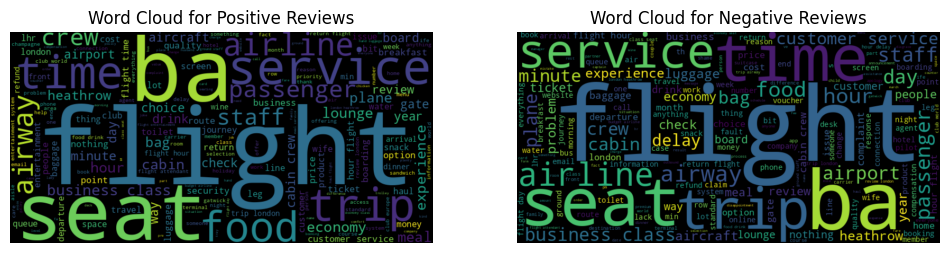

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a string of all tokens from positive and negative reviews
positive_text = ' '.join(positive_tokens)
negative_text = ' '.join(negative_tokens)

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400).generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Positive Reviews")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Negative Reviews")
plt.axis('off')

plt.show()


In [ ]:
# Top Positive and Negative Keywords (from your previous output)
positive_keywords = [('flight', 2020), ('seat', 990), ('ba', 965), ('service', 835), ('trip', 704), ('time', 634), ('food', 594), ('crew', 525), ('class', 491), ('airline', 484)]
negative_keywords = [('flight', 1647), ('ba', 771), ('seat', 586), ('service', 544), ('trip', 515), ('hour', 479), ('time', 453), ('airline', 410), ('airway', 332), ('food', 312)]

# Create sentences based on the top keywords
positive_sentence = f"Customers are generally satisfied with the **flight**, **seats**, and the **service** provided by British Airways."
negative_sentence = f"Common complaints from customers include **flight delays**, uncomfortable **seats**, and poor **service**."

print("Positive Review Insights (Satisfaction Drivers):")
print(positive_sentence)

print("\nNegative Review Insights (Dissatisfaction Drivers):")
print(negative_sentence)


Positive Review Insights (Satisfaction Drivers):
Customers are generally satisfied with the **flight**, **seats**, and the **service** provided by British Airways.

Negative Review Insights (Dissatisfaction Drivers):
Common complaints from customers include **flight delays**, uncomfortable **seats**, and poor **service**.


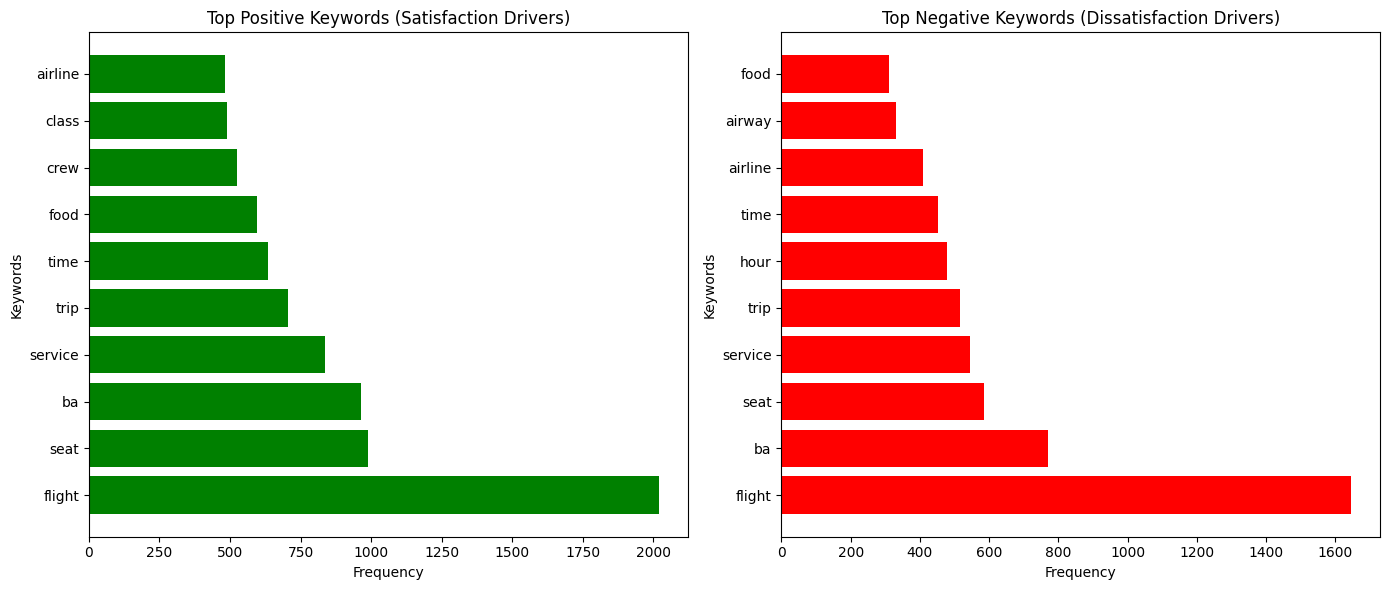

In [ ]:
import matplotlib.pyplot as plt

# Data for Positive and Negative Keywords
positive_keywords = [('flight', 2020), ('seat', 990), ('ba', 965), ('service', 835), ('trip', 704), ('time', 634), ('food', 594), ('crew', 525), ('class', 491), ('airline', 484)]
negative_keywords = [('flight', 1647), ('ba', 771), ('seat', 586), ('service', 544), ('trip', 515), ('hour', 479), ('time', 453), ('airline', 410), ('airway', 332), ('food', 312)]

# Split into words and frequencies
positive_words, positive_frequencies = zip(*positive_keywords)
negative_words, negative_frequencies = zip(*negative_keywords)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Positive Reviews Bar Chart
axes[0].barh(positive_words, positive_frequencies, color='green')
axes[0].set_title('Top Positive Keywords (Satisfaction Drivers)')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Keywords')

# Negative Reviews Bar Chart
axes[1].barh(negative_words, negative_frequencies, color='red')
axes[1].set_title('Top Negative Keywords (Dissatisfaction Drivers)')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Keywords')

# Show plot
plt.tight_layout()
plt.show()


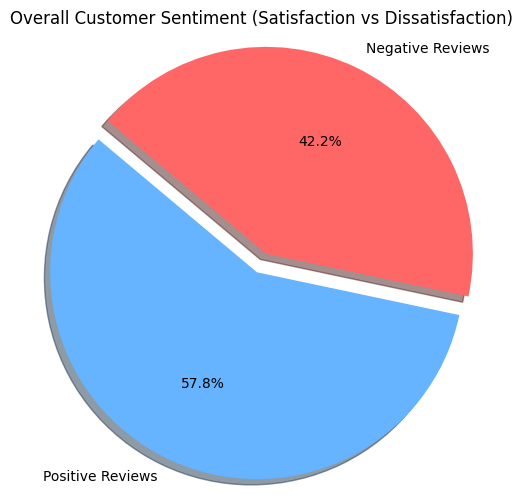

In [ ]:
# Count the number of positive and negative reviews
positive_count = sum([1 for review in review_preprocessed if review in positive_reviews])  # assuming you have labeled reviews
negative_count = sum([1 for review in review_preprocessed if review in negative_reviews])  # assuming you have labeled reviews

# Labels and data
labels = ['Positive Reviews', 'Negative Reviews']
sizes = [positive_count, negative_count]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)  # explode 1st slice for emphasis

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Overall Customer Sentiment (Satisfaction vs Dissatisfaction)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
def generate_review_sentence(keywords, sentiment="positive"):
    # Generate the main sentence depending on the sentiment type
    if sentiment == "positive":
        # Positive Sentence
        sentence = (
            f"Customers are generally satisfied with the overall **{keywords[0][0]}** experience, "
            f"mentioning that the **{keywords[1][0]}** were comfortable, the **{keywords[2][0]}** was excellent, "
            f"and the **{keywords[3][0]}** was professional. "
            f"Many reviews highlighted the **{keywords[4][0]}** as a key factor contributing to satisfaction. "
            f"The **{keywords[5][0]}** provided during the trip was also praised. "
            f"Overall, the **{keywords[6][0]}** management and the quality of **{keywords[7][0]}** were important aspects."
        )
    else:
        # Negative Sentence
        sentence = (
            f"Common complaints from customers include issues with **{keywords[0][0]}** delays, uncomfortable **{keywords[1][0]}**, "
            f"and poor **{keywords[2][0]}**. Many reviews expressed dissatisfaction with the **{keywords[3][0]}** provided during the **{keywords[4][0]}**. "
            f"The overall **{keywords[5][0]}** experience did not meet expectations. "
            f"**{keywords[6][0]}** and issues related to the **{keywords[7][0]}** operations were frequently mentioned as sources of frustration."
        )

    return sentence

# Top 10 Positive and Negative Keywords (from your previous output)
positive_keywords = [('flight', 2020), ('seat', 990), ('ba', 965), ('service', 835), ('trip', 704), ('time', 634), ('food', 594), ('crew', 525), ('class', 491), ('airline', 484)]
negative_keywords = [('flight', 1647), ('ba', 771), ('seat', 586), ('service', 544), ('trip', 515), ('hour', 479), ('time', 453), ('airline', 410), ('airway', 332), ('food', 312)]

# Generate sentences for positive and negative reviews
positive_review_sentence = generate_review_sentence(positive_keywords, sentiment="positive")
negative_review_sentence = generate_review_sentence(negative_keywords, sentiment="negative")

print("Positive Review Sentence:")
print(positive_review_sentence)

print("\nNegative Review Sentence:")
print(negative_review_sentence)


Positive Review Sentence:
Customers are generally satisfied with the overall **flight** experience, mentioning that the **seat** were comfortable, the **ba** was excellent, and the **service** was professional. Many reviews highlighted the **trip** as a key factor contributing to satisfaction. The **time** provided during the trip was also praised. Overall, the **food** management and the quality of **crew** were important aspects.

Negative Review Sentence:
Common complaints from customers include issues with **flight** delays, uncomfortable **ba**, and poor **seat**. Many reviews expressed dissatisfaction with the **service** provided during the **trip**. The overall **hour** experience did not meet expectations. **time** and issues related to the **airline** operations were frequently mentioned as sources of frustration.
